# Limpieza de Datos Dataset ProvProdu-20190712

In [1]:
import pandas as pd
from utils import  upload_to_bucket, replace_regex
import matplotlib.pyplot as plt
import seaborn as sns

# Importar Dataset

#### Importar el dataset y observar los primeros registros con head y verificar los tipos de datos con el método info.

In [2]:
prov_prod_col_names = [
    'id_proveedor', 'razon_social', 'id_sector', 'desc_sector', 'id_seccion',
    'desc_seccion', 'id_gran_flia', 'desc_gran_flia', 'id_flia', 'desc_flia',
    'id_sub_flia', 'desc_sub_flia', 'id_articulo', 'id_producto',
    'desc_producto', 'id_region', 'fecha'
]

In [3]:
prov_prod_df = pd.read_csv("../data/VMI_ProvProdu-20190712.txt",
                           encoding="UTF-8",
                           encoding_errors='replace',
                           header=None,
                           delimiter='\t',
                           names=prov_prod_col_names)

In [4]:
prov_prod_df.head()

,id_proveedor,razon_social,id_sector,desc_sector,id_seccion,desc_seccion,id_gran_flia,desc_gran_flia,id_flia,desc_flia,id_sub_flia,desc_sub_flia,id_articulo,id_producto,desc_producto,id_region,fecha
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27003,273920,REFILL CITRICO OIL ESCENCE AIR WICK CITRICOS ...,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27004,273921,FRESHMATIC AIRWICK LAVANDA REPUESTO 250.00 MLT,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27005,284012,AIR WICK CITRICO FULL REP.GRATIS AIR WICK AIR ...,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27012,359572,MAGNOLIA Y CHERRY AIR WICK REPUESTO 175.00 GR,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27007,415268,FRESHMATIC BOSQUE M�GICO APARATO AIR WICK LUSH...,1,2019-07-12 11:04:07.967


In [5]:
prov_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 1
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_proveedor    82 non-null     int64 
 1   razon_social    82 non-null     object
 2   id_sector       82 non-null     int64 
 3   desc_sector     82 non-null     object
 4   id_seccion      82 non-null     int64 
 5   desc_seccion    82 non-null     object
 6   id_gran_flia    82 non-null     int64 
 7   desc_gran_flia  82 non-null     object
 8   id_flia         82 non-null     int64 
 9   desc_flia       82 non-null     object
 10  id_sub_flia     82 non-null     int64 
 11  desc_sub_flia   82 non-null     object
 12  id_articulo     82 non-null     int64 
 13  id_producto     82 non-null     int64 
 14  desc_producto   82 non-null     object
 15  id_region       82 non-null     int64 
 16  fecha           82 non-null     object
dtypes: int64(9), object(8)
memory usage: 11.5+ KB


#### Observaciones Iniciales
-  El conjunto de datos analizado consta de 82 registros que proporcionan información sobre la relación entre la descripción del producto, la familia, subfamilia y gran familia, así como el nombre del proveedor correspondiente. Durante el análisis exploratorio de datos, se ha llevado a cabo una revisión exhaustiva de las diferentes categorías de variables de tipo objeto en el conjunto de datos con el objetivo de identificar los tipos de categorías presentes en el mismo.

In [6]:
columnas_categoricas = ['razon_social', 'desc_sector', 'desc_seccion', 'desc_gran_flia', 'desc_flia', 'desc_sub_flia', 'desc_producto']

In [7]:
# Conteo de los niveles en las diferentes columnas categóricas
for col in columnas_categoricas:
    print(f"Columna {col}: {prov_prod_df[col].nunique()} subnivele(s)")

Columna razon_social: 4 subnivele(s)
Columna desc_sector: 1 subnivele(s)
Columna desc_seccion: 1 subnivele(s)
Columna desc_gran_flia: 1 subnivele(s)
Columna desc_flia: 1 subnivele(s)
Columna desc_sub_flia: 1 subnivele(s)
Columna desc_producto: 81 subnivele(s)


In [8]:
grouped_data = prov_prod_df.groupby(['razon_social']).id_producto.count()
print(f"Total de productos suministrados por los cuatro principales proveedores: \n {grouped_data}")

Total de productos suministrados por los cuatro principales proveedores: 
 razon_social
Clorox argentina s.a.               21
Industrias iberia s.a.i.c.           1
Reckitt Benckiser Argentina S.A.    10
S. c. johnson y son de arg. s.a.    50
Name: id_producto, dtype: int64


In [9]:
grouped_data_by_flia = prov_prod_df.groupby(['desc_sector', 'desc_seccion', 'desc_gran_flia', 'desc_flia', 'desc_sub_flia']).id_producto.count()
print(f"Agrupacion de prooductos por gran familia, familia y subfamilia: \n{grouped_data_by_flia}")

Agrupacion de prooductos por gran familia, familia y subfamilia: 
desc_sector  desc_seccion  desc_gran_flia  desc_flia                  desc_sub_flia          
Almac�n      Limpieza      Ba�o y Hogar    Desodorantes de ambientes  Desodorantes en aerosol    82
Name: id_producto, dtype: int64


- Podemos concluir que el conjunto de datos contiene un total de 82 productos únicos que son suministrados por cuatro proveedores principales. En su mayoría, estos productos pertenecen a la categoría de desodorantes en aerosol, que se encuentra dentro de la familia de desodorantes de ambientes clasificados como productos de limpieza para el baño y hogar.

- En función de los objetivos específicos de este análisis, se ha decidido que las columnas de razon social, id del proveedor, id del producto y descripción del producto son las únicas que se utilizarán, eliminando así las demás columnas del dataset.

In [10]:
# Eliminar del dataset las columnas que no son relevantes para el análisis.
prov_prod_df.drop(['id_sector', 'desc_sector', 'id_seccion', 'desc_seccion', 'id_gran_flia', 'desc_gran_flia', 'id_flia', 'desc_flia', 'id_sub_flia', 'desc_sub_flia', 'id_articulo', 'fecha'], axis=1, inplace=True)

In [11]:
prov_prod_df = prov_prod_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [12]:
prov_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 1
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_proveedor   82 non-null     int64 
 1   razon_social   82 non-null     object
 2   id_producto    82 non-null     int64 
 3   desc_producto  82 non-null     object
 4   id_region      82 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ KB


In [13]:
print(prov_prod_df.id_producto.nunique())

82


#### Arreglar errores de semantica en la columna desc_producto, remover characteres especiales.

In [14]:
replace_regex(prov_prod_df, 'desc_producto', 'm�gico', 'magico')
replace_regex(prov_prod_df, 'desc_producto', 'el�c', 'elec')
replace_regex(prov_prod_df, 'desc_producto', 'lim�n', 'limon')
replace_regex(prov_prod_df, 'desc_producto', 'autom�tico', 'automatico')
replace_regex(prov_prod_df, 'desc_producto', 'algod�n', 'algodon')
replace_regex(prov_prod_df, 'desc_producto', 'man�na', 'manana')
replace_regex(prov_prod_df, 'desc_producto', 'el�ctricos', 'electricos')
replace_regex(prov_prod_df, 'desc_producto', 'ac�stica', 'acustica')

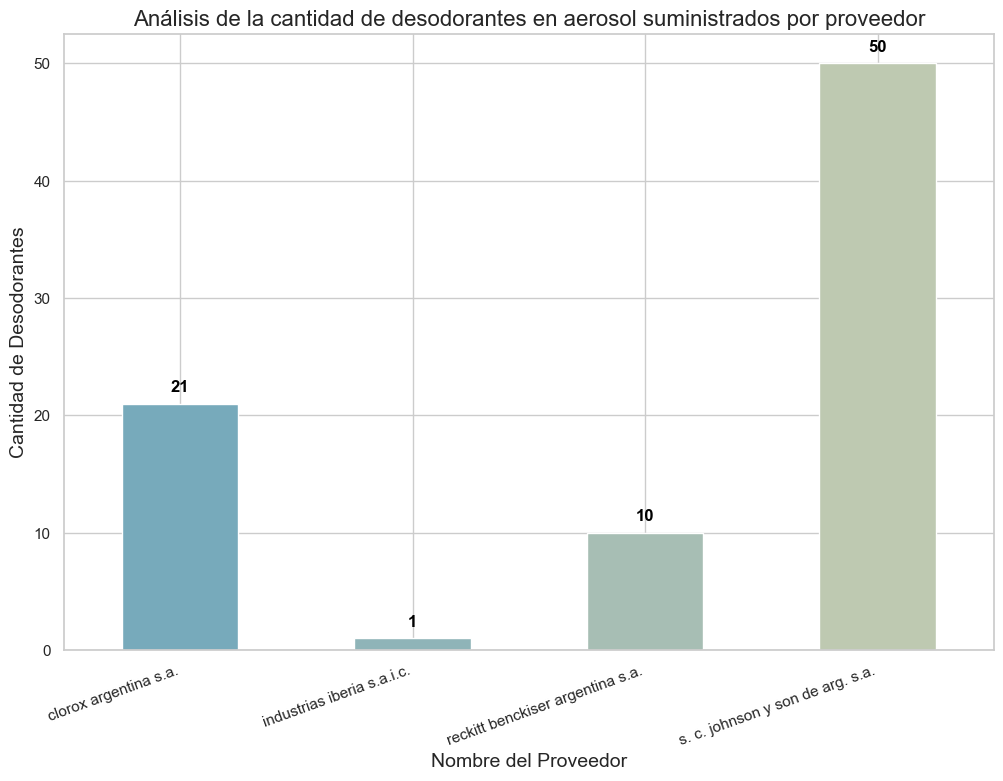

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# set the seaborn theme
sns.set_style("whitegrid")

# set the color palette
color = "blend:#7AB,#EDA"
sns.set_palette(sns.color_palette(color))

# set the figure size and title font size
plt.figure(figsize=(12, 8))
plt.title('Análisis de la cantidad de desodorantes en aerosol suministrados por proveedor', fontsize=16)

# create a bar chart of the grouped data
grouped_data = prov_prod_df.groupby(['razon_social']).id_producto.count()
ax = grouped_data.plot(kind='bar', color=sns.color_palette())

# set chart labels and axis font size
ax.set_xlabel('Nombre del Proveedor', fontsize=14)
ax.set_ylabel('Cantidad de Desodorantes', fontsize=14)

# add labels to the bars
for i, v in enumerate(grouped_data):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

# save the chart as a PNG image
plt.savefig('../eda/images/productos_por_proveedor.png')

# display the chart
plt.show()


#### Guardar el dataset limpio

In [62]:
prov_prod_df.to_csv('../clean_data/prov_prod_clean.csv', index=False)

#### Subir csv a google cloud storage

In [63]:
upload_to_bucket('deodorants', '../clean_data/prov_prod_clean.csv', 'prov_prod')

File ../clean_data/prov_prod_clean.csv uploaded successfully to bucket deodorants/prov_prod
